## Board Game Geek Data
This notebook documents exploration of game data from 50 games of the board game: Settlers of Catan. As one of my favourite board games, it would be interesting to see if anything affects the probability of winning. The data is available [here](https://www.kaggle.com/datasets/lumins/settlers-of-catan-games).

Let us begin with importing some modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we read in the data:

In [3]:
df = pd.read_csv("catanstats.csv")

In [4]:
df.head()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 26,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53


In [8]:
#Let's check where the NaNs are
df.isnull().sum()

gameNum              0
player               0
points               0
me                 150
2                    0
3                    0
4                    0
5                    0
6                    0
7                    0
8                    0
9                    0
10                   0
11                   0
12                   0
settlement1          0
Unnamed: 16          0
Unnamed: 17          0
Unnamed: 18          0
Unnamed: 19          0
Unnamed: 20          0
settlement2          0
Unnamed: 22          0
Unnamed: 23          0
Unnamed: 24          0
Unnamed: 25          0
Unnamed: 26          0
production           0
tradeGain            0
robberCardsGain      0
totalGain            0
tradeLoss            0
robberCardsLoss      0
tribute              0
totalLoss            0
totalAvailable       0
dtype: int64

Seems like there are no NaNs other than in the me variable, which makes sense because there are 50 games, so this variable is only relevant in 50 rows of data. 

In [11]:
df.columns

Index(['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', 'settlement1', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'settlement2',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'production', 'tradeGain', 'robberCardsGain',
       'totalGain', 'tradeLoss', 'robberCardsLoss', 'tribute', 'totalLoss',
       'totalAvailable'],
      dtype='object')

A comprehensive list of variables and their meanings is available from the data source (link in introduction). It seems that when we read the csv into our notebook that some columns remained unnamed, let us devise a new naming scheme for some of the variables:

R$i$_$j$- Type of resource on the $j$th recorded hex (arbitrary) of $i$th starting settlement

N$i$_$j$- Number on the $j$th recorded hex of $i$th initial starting settlement  (i.e. number to be rolled to get the resource of that hex)

P$i$_$j$- Probability unit out of 36 of having the $j$th recorded hex of the $i$th starting settlement rolled in any given roll

where i $\in \{1,2\}$ and $j\in\{1,2,3\}$

Note that P$i$_$j$ is not native to the data set and so we must construct it.

In [14]:
#Rename Variables
df.rename(columns={"settlement1": "N1_1", "Unnamed: 16": "R1_1", "Unnamed: 17": "N1_2", "Unnamed: 18": "R1_2", 'Unnamed: 19': "N1_3", "Unnamed: 20": "R1_3",
                   "settlement2": "N2_1", "Unnamed: 22": "R2_1", "Unnamed: 23": "N2_2", "Unnamed: 24": "R2_2", 'Unnamed: 25': "N2_3", "Unnamed: 26": "R2_3"},inplace = True)

In [16]:
for i in range(1,3):
    for j in range(1,4):
        df["P"+str(i)+"_"+str(j)] = df.apply(lambda x: 6 - abs(7-x["N"+str(i)+"_"+str(j)] if x["N"+str(i)+"_"+str(j)]>1 else 0),axis=1)

In [18]:
#Let's check the dimensions
df.shape

(200, 42)

## Does player position/order matter?

In Catan, players take turns placing initial settlements that determine the resources that players have available to them in the early stages of the game. 

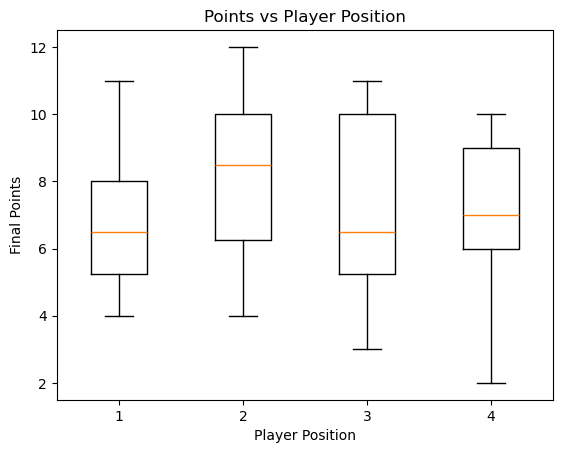

In [22]:
#Graph settlement choosing position vs final points
player = (df[df["player"] == 1]["points"], df[df["player"] == 2]["points"], df[df["player"] == 3]["points"], df[df["player"] == 4]["points"])
plt.boxplot(player, showfliers = True)
plt.title("Points vs Player Position")
plt.xlabel("Player Position")
plt.ylabel("Final Points")
plt.show()

So it seems, 2nd place is the best position to be in followed by 3rd, 4th and then 1st. 

But why should we care about players who don't win? What happens if we restrict the analysis to winning players only?

In [25]:
df_winners = df.sort_values("points").drop_duplicates("gameNum", keep = "last")

In [27]:
#Let's look at some summary statistics of the variables of winners only
df_winners.describe()

,gameNum,player,points,me,2,3,4,5,6,7,...,robberCardsLoss,tribute,totalLoss,totalAvailable,P1_1,P1_2,P1_3,P2_1,P2_2,P2_3
count,50.00000,50.00000,50.000000,25.0,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000
mean,25.50000,2.52000,10.100000,1.0,1.700000,3.960000,4.70000,7.400000,9.160000,10.980000,...,6.800000,5.680000,33.540000,48.540000,4.240000,4.280000,2.960000,4.180000,3.68000,2.50000
std,14.57738,0.99468,0.364216,0.0,1.460361,1.999592,1.94044,2.249717,3.092849,4.867594,...,4.318919,5.460209,12.618758,7.767567,0.624663,0.757008,1.142143,0.800255,1.09619,1.28174
min,1.00000,1.00000,10.000000,1.0,0.000000,0.000000,0.00000,1.000000,3.000000,2.000000,...,1.000000,0.000000,11.000000,35.000000,3.000000,3.000000,1.000000,2.000000,1.00000,1.00000
25%,13.25000,2.00000,10.000000,1.0,1.000000,3.000000,3.25000,6.000000,7.000000,7.250000,...,4.000000,0.000000,23.250000,43.250000,4.000000,4.000000,2.000000,4.000000,3.00000,2.00000
50%,25.50000,2.00000,10.000000,1.0,1.000000,3.500000,5.00000,7.000000,9.500000,10.000000,...,6.000000,4.500000,33.000000,47.000000,4.000000,4.000000,3.000000,4.000000,4.00000,2.00000
75%,37.75000,3.00000,10.000000,1.0,3.000000,5.000000,6.00000,8.750000,11.000000,14.000000,...,8.750000,9.750000,40.750000,52.000000,5.000000,5.000000,3.000000,5.000000,5.00000,3.00000
max,50.00000,4.00000,12.000000,1.0,6.000000,9.000000,10.00000,13.000000,16.000000,23.000000,...,21.000000,24.000000,72.000000,77.000000,5.000000,5.000000,6.000000,5.000000,5.00000,6.00000


In [29]:
df_winners[df_winners["points"]>10]

,gameNum,player,points,me,2,3,4,5,6,7,...,robberCardsLoss,tribute,totalLoss,totalAvailable,P1_1,P1_2,P1_3,P2_1,P2_2,P2_3
188,48,1,11,1.0,0,6,7,7,10,6,...,8,4,35,59,4,5,3,5,3,2
29,8,2,11,NaN,3,0,4,7,6,9,...,2,4,22,58,4,5,4,3,4,2
150,38,3,11,NaN,2,2,4,7,10,17,...,9,0,41,52,4,5,4,5,1,6
185,47,2,12,1.0,1,4,5,6,11,5,...,4,0,23,56,5,3,6,5,3,2


It is interesting that games can be won with greater than the minimum 10 points required due to large swings with largest army or longest road. 

In [32]:
points = df_winners.groupby("player").count()["points"]
frequency = points/sum(points)

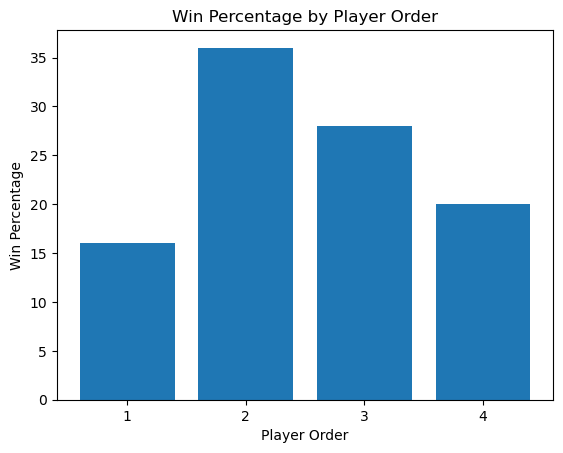

In [34]:
plt.bar(x = ("1","2","3","4"), height = frequency*100)
plt.title("Win Percentage by Player Order")
plt.xlabel("Player Order")
plt.ylabel("Win Percentage")
plt.show()

The ordering of best to worst position to be in remains the same as with all players. We conclude that if possible, you want to be 2nd as opposed to 3rd as opposed to 4th as opposed to 1st in terms of player order.

# Did they roll fair dice?
Many of the mathematical tools that we have rely on limits. Those who have played before can guess that infinite games rarely happen, despite how some players may feel during the game. Let us see how far the distributions
diverge from the mathematical ideal. 

Let's graph the distribution of average empirical die rolls and see how it compares to the theoretical distribution of the sum of two die. 

In [38]:
roll_nums = ["2","3","4","5","6","7","8","9","10","11","12"]

In [40]:
avg_rolls = df.describe().loc['mean'].loc[roll_nums]

In [42]:
aggregate_rolls = df[roll_nums].sum()
roll_freq = aggregate_rolls / sum(aggregate_rolls)*100

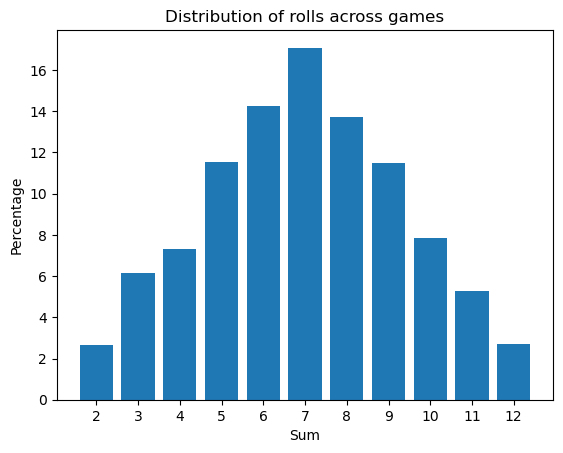

In [44]:
plt.bar(x = roll_nums, height = roll_freq)
plt.xlabel("Sum")
plt.ylabel("Percentage")
plt.title("Distribution of rolls across games")
plt.show()

This empirical distribution appears to be fairly symmetrical and resemble the theoretical distribution. This gives us some confidence that this game data can give us useful conclusions and that the die are indeed fair and representative. 

# Is greed good?
As a euro board game, where the goal is not to win a direct conflict but rather a race of economic development, there is an intuitive notion that "more is better". However, as data-driven gamers, we should confirm this. Let us investigate the relationship between total resource card gain from any source to each player's final victory point count. Note that a large part of each players card gain is using from production.

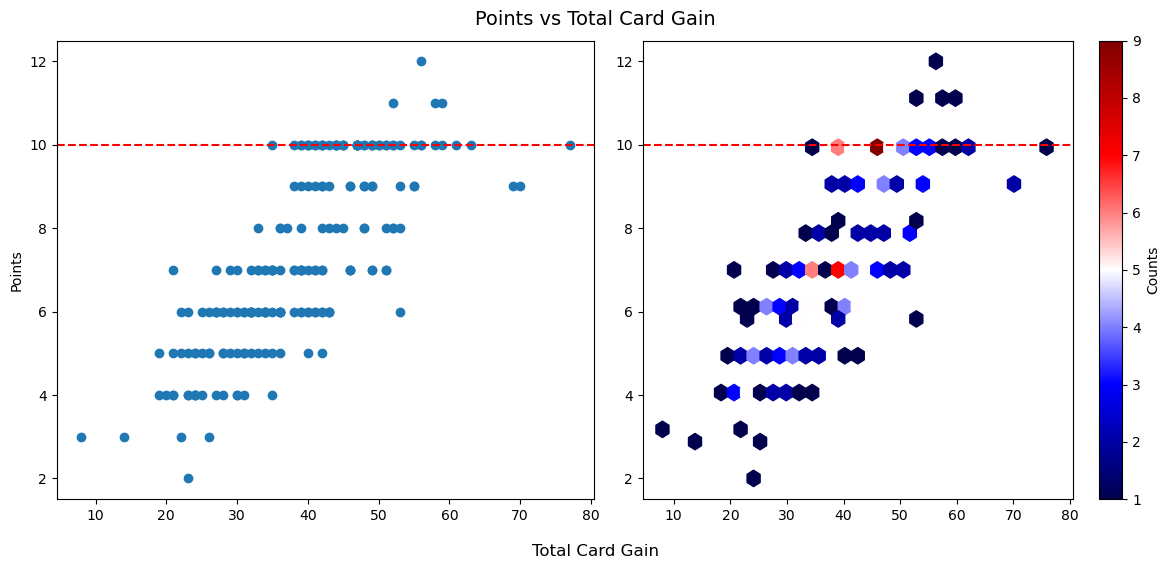

In [48]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: scatter plot
axes[0].scatter(x=df["totalAvailable"], y=df["points"])
axes[0].axhline(y=10, color="r", linestyle="--")
axes[0].set_ylabel("Points")

# Second subplot: hexbin plot
hb = axes[1].hexbin(df["totalAvailable"], df["points"], gridsize=30, mincnt=1, cmap="seismic")
axes[1].axhline(y=10, color="r", linestyle="--")
fig.colorbar(hb, ax=axes[1], label="Counts")

# Set a common title for the entire figure
fig.suptitle("Points vs Total Card Gain", fontsize=14, y = 0.91)

# Set a common x-axis label for the entire figure
fig.text(0.5, 0.0, 'Total Card Gain', ha='center', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [50]:
print("The correlation between points and total card gain is:", np.corrcoef(df["totalAvailable"],df["points"])[0,1])

The correlation between points and total card gain is: 0.7728809603330544


In the figures above, the red line represents the threshold for winning the game. So all points on or above the dotted red line are winners of their respective games.The left plot is a scatter plot and the right plot is a hexbin plot (imagine a scatter plot with colours to signify density). Each hexagon in the hexbin plot denotes density by colour, where colder colours denote lower counts and warmer colours denote higher counts.

In general, there seems to be a relatively strong positive correlation between total card gain and victory points. Further, winners (denoted by the points on or above the red line) tend to have gained more cards throughout the game. Our intuition holds and indeed, greed is good.

# Does crime pay?

The robber is a central balancing and catch-up mechanism often used to slow down the development of the leading player or take a gamble and see if you will get a resource that you need to further develop. Is it the case that more counts of theft is conducive to more victory points? We investigate by looking at the number of cards each player gained from robbing others each game. 

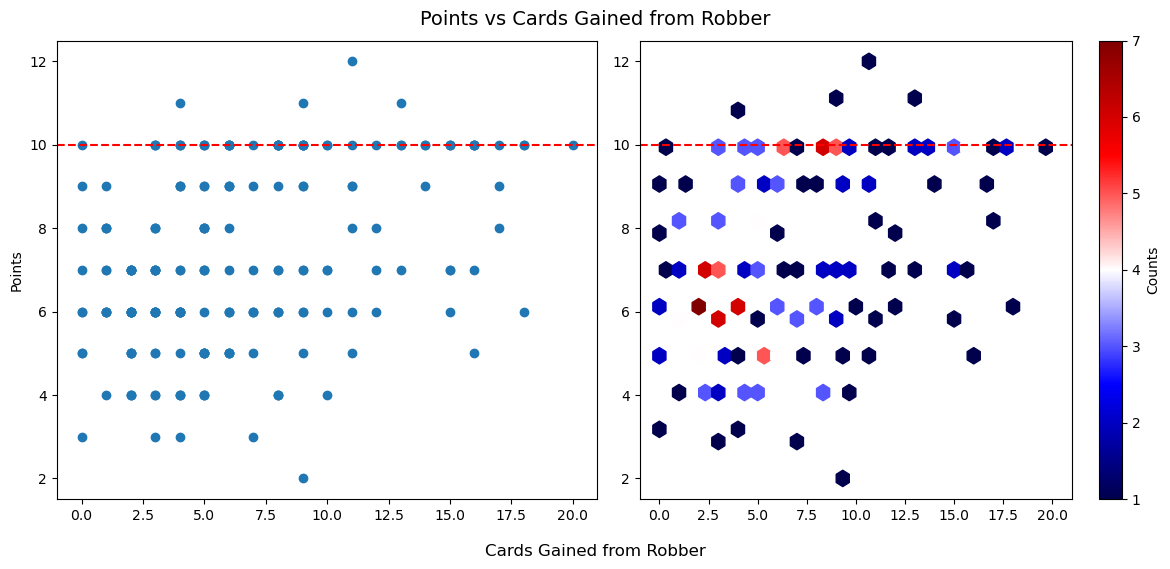

In [54]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: scatter plot
axes[0].scatter(x=df["robberCardsGain"], y=df["points"])
axes[0].axhline(y=10, color="r", linestyle="--")
axes[0].set_ylabel("Points")

# Second subplot: hexbin plot
hb = axes[1].hexbin(df["robberCardsGain"], df["points"], gridsize=30, mincnt=1, cmap="seismic")
axes[1].axhline(y=10, color="r", linestyle="--")
fig.colorbar(hb, ax=axes[1], label="Counts")

# Set a common title for the entire figure
fig.suptitle("Points vs Cards Gained from Robber", fontsize=14, y = 0.91)

# Set a common x-axis label for the entire figure
fig.text(0.5, 0.0, 'Cards Gained from Robber', ha='center', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [56]:
print("The correlation between points and cards gained from robber is:", np.corrcoef(df["robberCardsGain"],df["points"])[0,1])

The correlation between points and cards gained from robber is: 0.3738660919941921


There seems to be a weak positive correlation between points and cards gained from robber. In the figures above, it seems crime is not strictly necessary for victory in settling Catan. One potential explanation is that others can rob for you, and it has the similar effect of slowing down the leading player. In other words, crime doesn't always pay.

# Are unfair trades actually unfair?

Players often need to trade to make up for resource production deficiencies with trades. Oftentimes, players are willing to take an "unfair" trade where they give more than one resource in return for only one resource. Let us investigate if these trades are worth it. We do so by investigating the relationship between final victory points and the difference between all cards gained from trade and loss from trade, including trades done in maritime trade. 

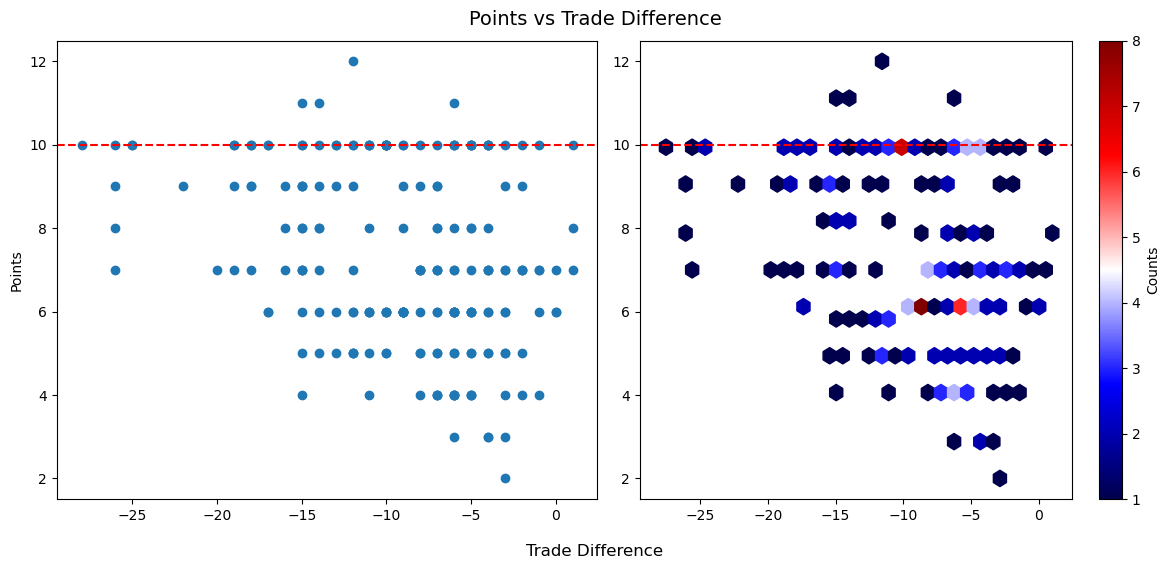

In [60]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: scatter plot
axes[0].scatter(x=df["tradeGain"]-df["tradeLoss"], y=df["points"])
axes[0].axhline(y=10, color="r", linestyle="--")
axes[0].set_ylabel("Points")

# Second subplot: hexbin plot
hb = axes[1].hexbin(df["tradeGain"]-df["tradeLoss"], df["points"], gridsize=30, mincnt=1, cmap="seismic")
axes[1].axhline(y=10, color="r", linestyle="--")
fig.colorbar(hb, ax=axes[1], label="Counts")

# Set a common title for the entire figure
fig.suptitle("Points vs Trade Difference", fontsize=14, y = 0.91)

# Set a common x-axis label for the entire figure
fig.text(0.5, 0.0, 'Trade Difference', ha='center', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [62]:
print("The correlation between points and trade loss is:", np.corrcoef(df["tradeGain"]-df["tradeLoss"],df["points"])[0,1])

The correlation between points and trade loss is: -0.3127935387714132


It is interesting to note that effectively all players suffer a trade defecit rather than a surplus. Winners don't necessarily take more unfair trades than other players. Intuitively, resources are useless until converted into useful tools, such as settlements, cities or development cards, and therefore some level of unfair trading to get what you might need now is warranted. Although, the negative correlation implies that taking too many unfair trades begins to benefit your opponents more than it helps you. In short, try to minimise unfair trades beyond what is necessary. 

# Which resources are best for initial settlement placement?
Are particular resources more conducive to winning? To find this out we will define new columns that count that number of pips of each resource:

L- log

C - clay

S - sheep

W - wheat

O - ore

Let us first count the number of pips of each resource and the number of ports that are present in the first two settlements of each player.

In [66]:
for i in ["L", "C", "S", "W", "O", "3G", "2L", "2C", "2S", "2W", "2O", "D"]:
    df[i] = 0

In [68]:
#define for loop to create resource column 
for resource in ["L", "C", "S", "W", "O"]:
    for i in range(1,3):
        for j in range(1,4):
            df[resource] = df.apply(lambda x: x[resource] + x["P"+str(i)+"_"+str(j)] if x["R"+str(i)+"_"+str(j)] == resource else x[resource], axis=1)

#define for loop to create port counts
for resource in ["3G", "2L", "2C", "2S", "2W", "2O", "D"]:
    for i in range(1,3):
        for j in range(1,4):
            df[resource] = df.apply(lambda x: x[resource] + 1 if x["R"+str(i)+"_"+str(j)] == resource else x[resource], axis=1)

In [70]:
df[["R1_1","P1_1","R1_2","P1_2","R1_3","P1_3","R2_1","P2_1", "R2_2", "P2_2", "R2_3", "P2_3", "L","C", "S", "W", "O", "3G", "2L", "2C", "2S", "2W", "2O", "D"]].head()

,R1_1,P1_1,R1_2,P1_2,R1_3,P1_3,R2_1,P2_1,R2_2,P2_2,...,S,W,O,3G,2L,2C,2S,2W,2O,D
0,L,5,C,2,C,2,L,4,W,3,...,0,3,2,0,0,0,0,0,0,0
1,W,4,O,5,W,3,L,3,S,4,...,4,7,7,0,0,0,0,0,0,0
2,S,4,S,5,W,1,O,5,S,3,...,12,1,5,0,0,0,0,0,0,0
3,O,5,L,4,L,2,L,3,L,5,...,3,0,5,0,0,0,0,0,0,0
4,W,5,O,4,O,3,W,5,L,3,...,0,10,7,0,1,0,0,0,0,0


In [72]:
print("The correlation between points and wheat pips is:", np.corrcoef(df["W"],df["points"])[0,1])

The correlation between points and wheat pips is: 0.004746235976792095


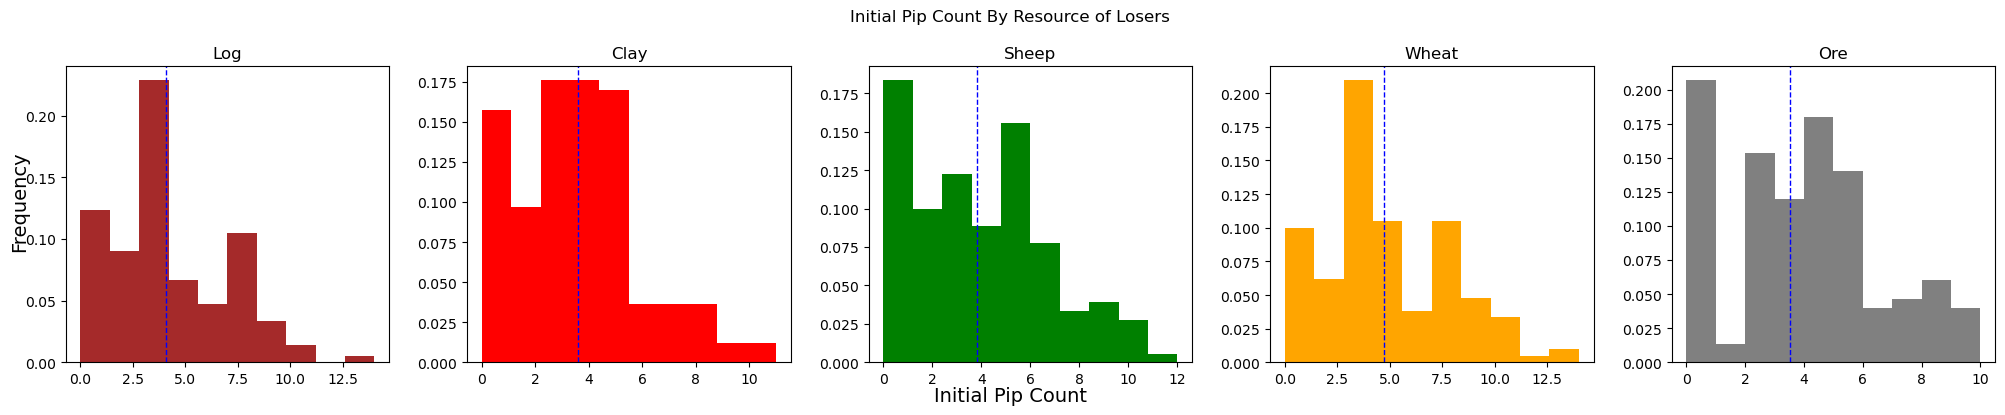

In [122]:
# Create a figure with 5 subplots in one row
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Adjust figsize as needed

# Sample data for the histograms

# Plotting the histograms in each subplot
axes[0].hist(df[df["points"]<10]["L"], color='brown', density = True)
axes[0].set_title('Log')
axes[0].axvline(df[df["points"]<10]["L"].mean(), color='blue', linestyle='dashed', linewidth=1)

axes[1].hist(df[df["points"]<10]["C"], color='red', density = True)
axes[1].set_title('Clay')
axes[1].axvline(df[df["points"]<10]["C"].mean(), color='blue', linestyle='dashed', linewidth=1)

axes[2].hist(df[df["points"]<10]["S"], color='green', density = True)
axes[2].set_title('Sheep')
axes[2].axvline(df[df["points"]<10]["S"].mean(), color='blue', linestyle='dashed', linewidth=1)

axes[3].hist(df[df["points"]<10]["W"], color='orange', density = True)
axes[3].set_title('Wheat')
axes[3].axvline(df[df["points"]<10]["W"].mean(), color='blue', linestyle='dashed', linewidth=1)

axes[4].hist(df[df["points"]<10]["O"], color='grey', density = True)
axes[4].set_title('Ore')
axes[4].axvline(df[df["points"]<10]["O"].mean(), color='blue', linestyle='dashed', linewidth=1)

# Adding common labels and title
fig.suptitle('Initial Pip Count By Resource of Losers')
fig.text(0.5, 0, 'Initial Pip Count', ha='center', fontsize=14)
fig.text(0, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

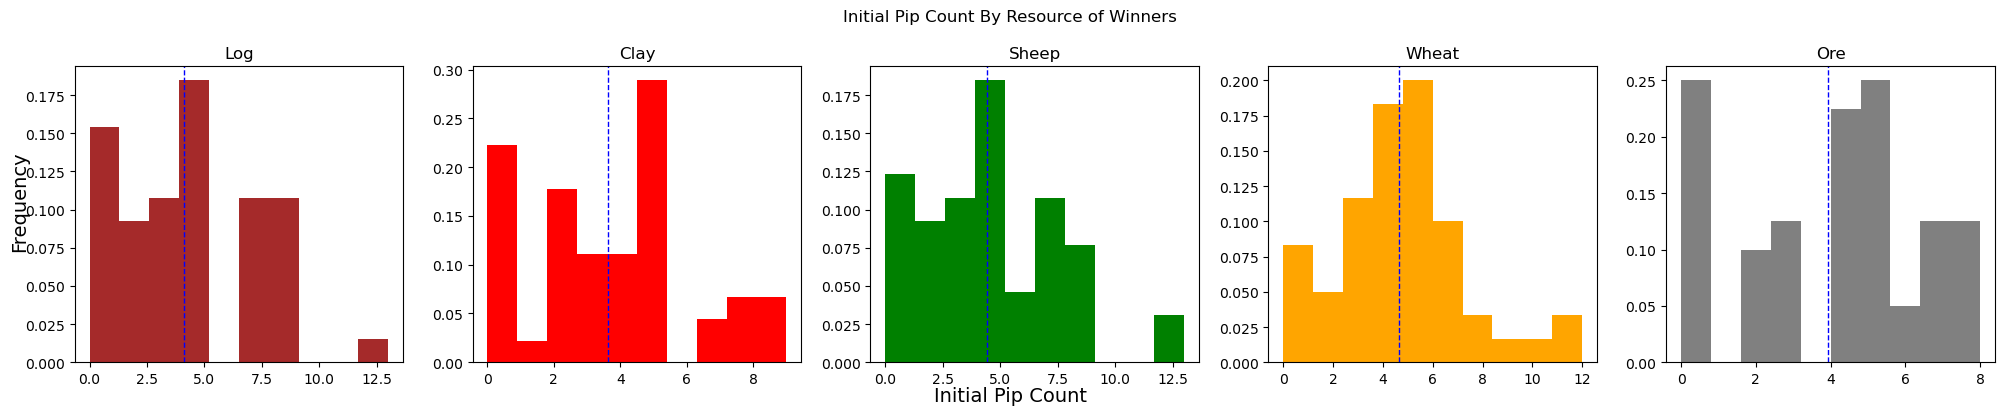

In [120]:
# Create a figure with 5 subplots in one row
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Adjust figsize as needed

# Sample data for the histograms

# Plotting the histograms in each subplot
axes[0].hist(df[df["points"]>=10]["L"], color='brown', density = True)
axes[0].set_title('Log')
axes[0].axvline(df[df["points"]>=10]["L"].mean(), color='blue', linestyle='dashed', linewidth=1)

axes[1].hist(df[df["points"]>=10]["C"], color='red', density = True)
axes[1].set_title('Clay')
axes[1].axvline(df[df["points"]>=10]["C"].mean(), color='blue', linestyle='dashed', linewidth=1)

axes[2].hist(df[df["points"]>=10]["S"], color='green', density = True)
axes[2].set_title('Sheep')
axes[2].axvline(df[df["points"]>=10]["S"].mean(), color='blue', linestyle='dashed', linewidth=1)

axes[3].hist(df[df["points"]>=10]["W"], color='orange', density = True)
axes[3].set_title('Wheat')
axes[3].axvline(df[df["points"]>=10]["W"].mean(), color='blue', linestyle='dashed', linewidth=1)

axes[4].hist(df[df["points"]>=10]["O"], color='grey', density = True)
axes[4].set_title('Ore')
axes[4].axvline(df[df["points"]>=10]["O"].mean(), color='blue', linestyle='dashed', linewidth=1)

# Adding common labels and title
fig.suptitle('Initial Pip Count By Resource of Winners')
fig.text(0.5, 0, 'Initial Pip Count', ha='center', fontsize=14)
fig.text(0, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Qualitatively, even among winners, each resource is chosen quite regularly. The blue dotted line in each graph reperesents the average initial pip count for that resource. 

Some comparisons between the distribution of pips in each resource from all players to winners:

- Clay and Ore initial pip counts never surpass 10 among winners 
- Winners tended to commit to low to medium levels of ore as opposed to losers
- Wheat pip count distribution is more symmetrical among winners

Overall though, it seems a diverse range of resources are valued by all players. 